In [1]:
from models.Segformer import SegDataset, HopfieldModel, Viz
from enum import Enum
from transformers import SegformerForSemanticSegmentation



/home/joe/vt/ml/hopfield-layers/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# define pretrained models


id2label = {0: 'background', 1: 'object'} 
label2id = {'background': 0, 'object': 1} 




segformer = SegformerForSemanticSegmentation.from_pretrained(
            "nvidia/mit-b0",
            id2label=id2label,
            label2id=label2id)
        
    
# define dataset
path = "/home/joe/vt/ml/hopfield-layers/segmentation/data/imagenet"
    



Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


100%|██████████| 10/10 [00:02<00:00,  4.24it/s]

Image:  0


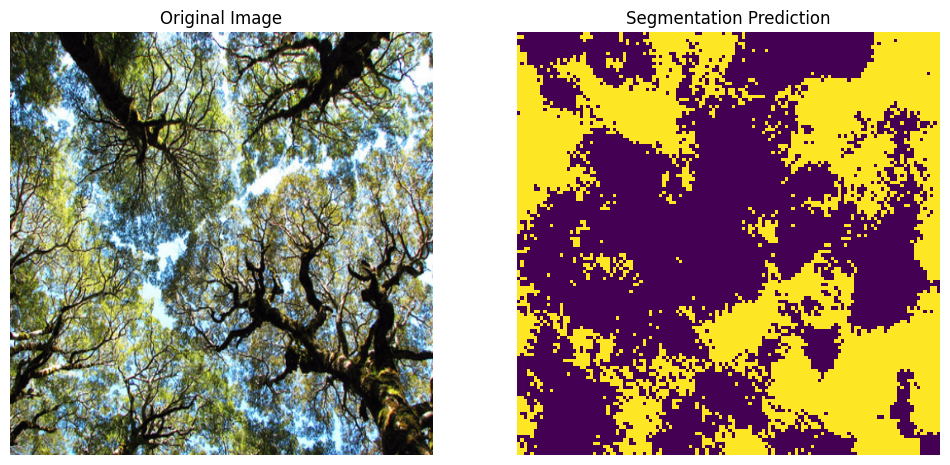

Image:  1


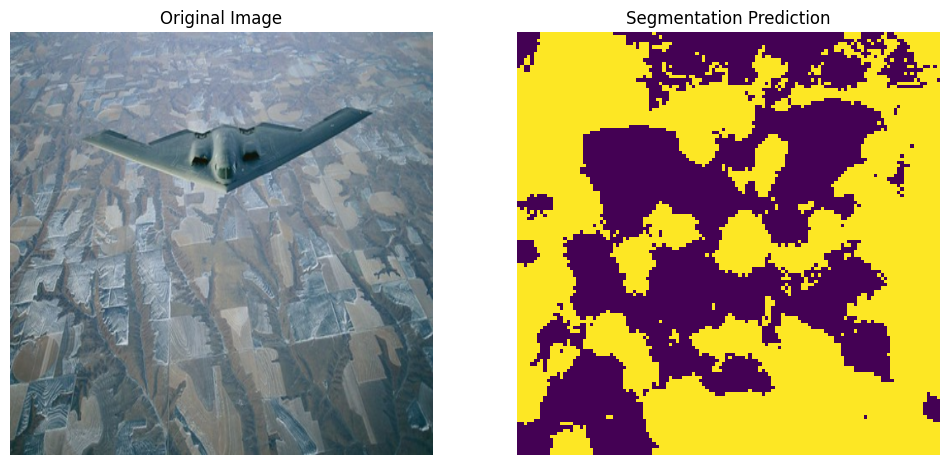

Image:  2


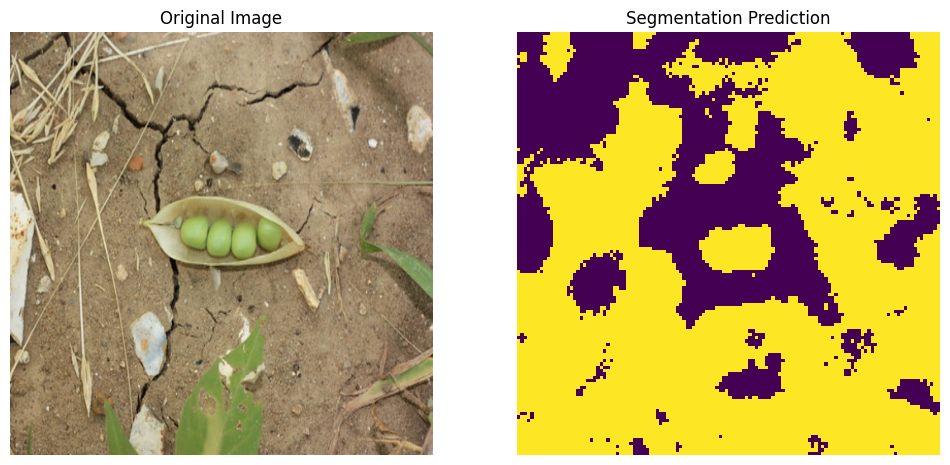

Image:  3


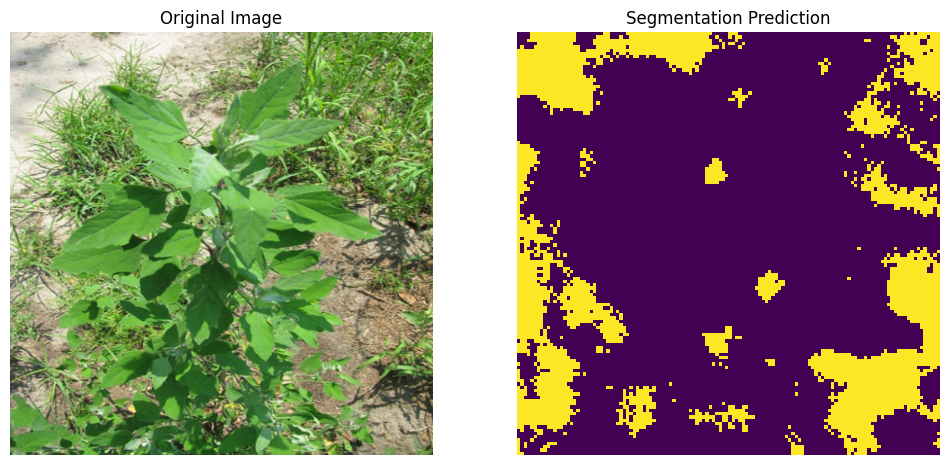

Image:  4


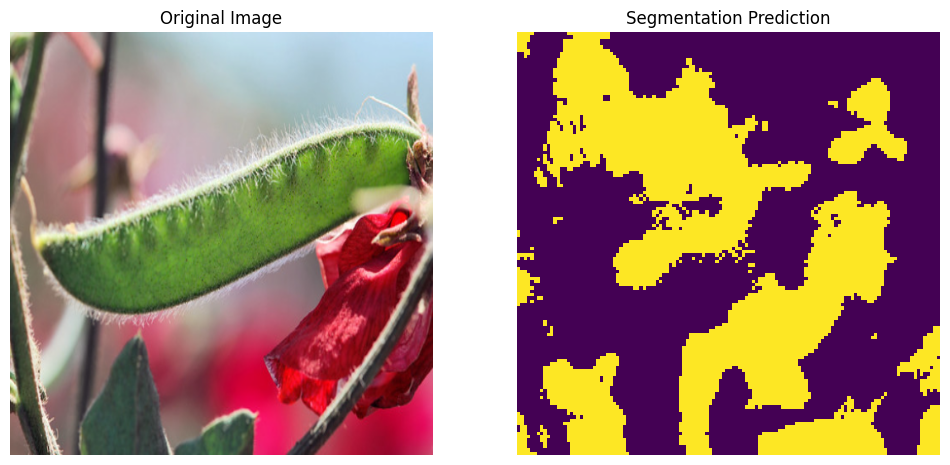

Image:  5


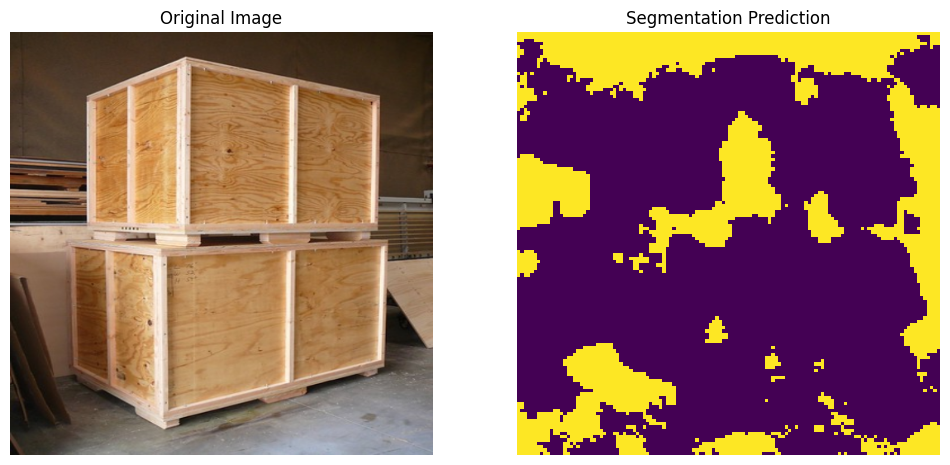

Image:  6


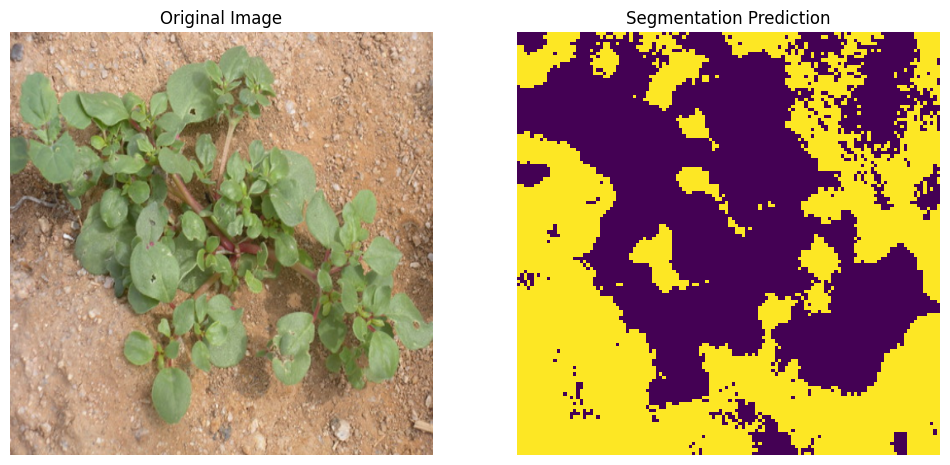

Image:  7


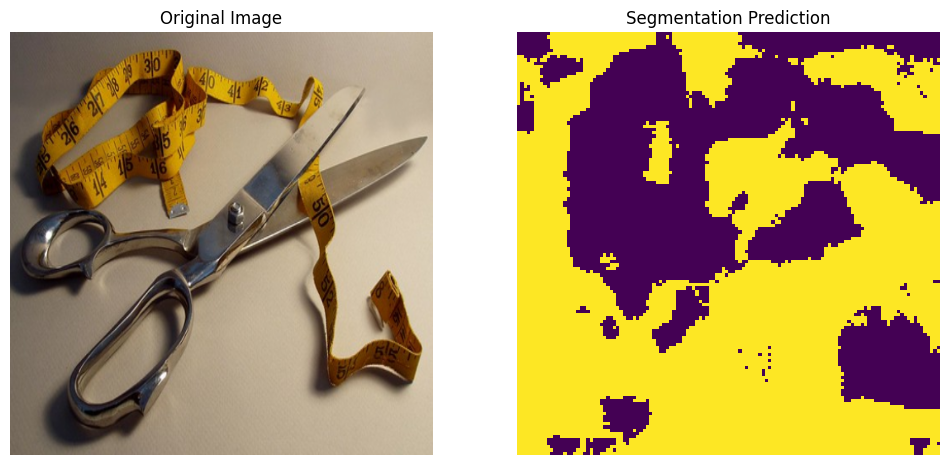

Image:  8


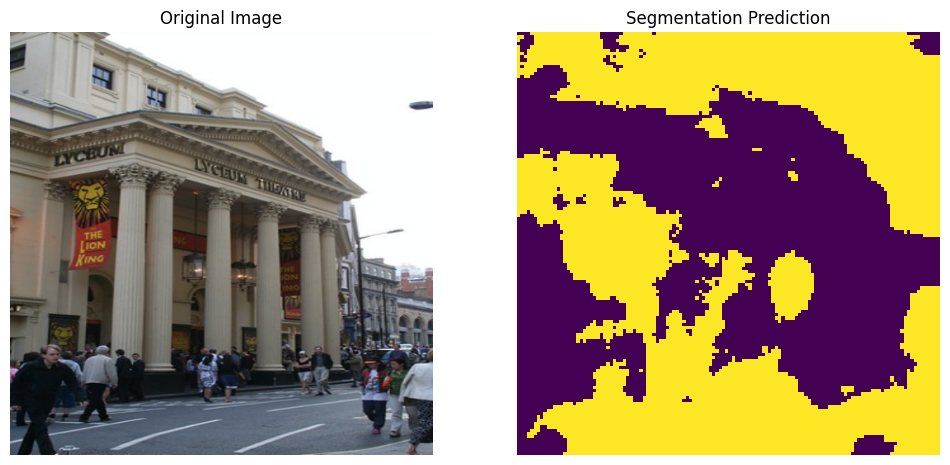

Image:  9


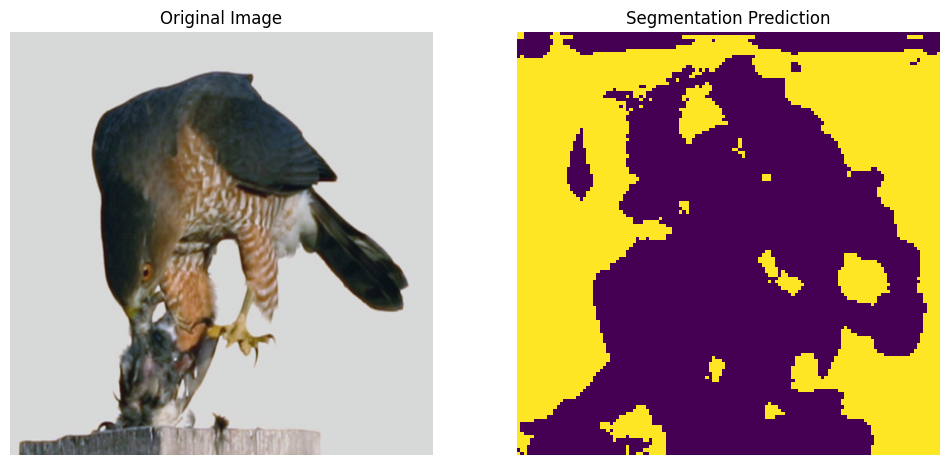

RuntimeError: The size of tensor a (262144) must match the size of tensor b (16384) at non-singleton dimension 1

In [3]:

# test pretrained models

def test_pretrained_model(pretrained_model):
    data = SegDataset.SegDataset(path)
    model = HopfieldModel.HopfieldModel(pretrained_model)

    images, predictions = model.evaluate(data.loader)

    for i in range(len(images)):
        print("Image: ", i)
        Viz.visualize(images[i], predictions[i])
    
    Viz.graph_iou(images, predictions)

        

test_pretrained_model(segformer)



